## Importing libraries

In [1]:
import pandas as pd

from geopy.distance import vincenty #distance measurement

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

%autosave 120

Autosaving every 120 seconds


# Importing Data

In [2]:
df=pd.read_csv("../NYC_Taxi_competition_data/train.csv")
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


# Data Processing

## Adding Trip Duration (timedelta) column

In [3]:
df['trip_duration_td']=pd.to_datetime(df['dropoff_datetime'])-pd.to_datetime(df['pickup_datetime'])
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_td
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,00:07:35
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,00:11:03
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,00:35:24
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,00:07:09
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,00:07:15


## Adding trip distance

In [4]:
df['distance']=df.apply(lambda x: vincenty((x['dropoff_latitude'], x['dropoff_longitude']), (x['pickup_latitude'], x['pickup_longitude'])).meters, axis = 1)

## Looking for corupted data and excluding them

In [5]:
df.drop(df[df.distance/df.trip_duration>41.67].index,inplace=True); #droping trips with average speed over 41.67 m/s= 150 km/h

In [6]:
df[df.trip_duration<=1].distance.describe()

count    30.000000
mean      4.543902
std       7.533643
min       0.000000
25%       0.000000
50%       0.847227
75%       6.557290
max      32.299030
Name: distance, dtype: float64

# Data Overview

## Number of trips

In [7]:
df.id.count()

1458546

## Trip duration (seconds)

### Trip duration summary

In [8]:
df['trip_duration'].describe()

count    1.458546e+06
mean     9.595435e+02
std      5.237603e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

### Trip duration histogram

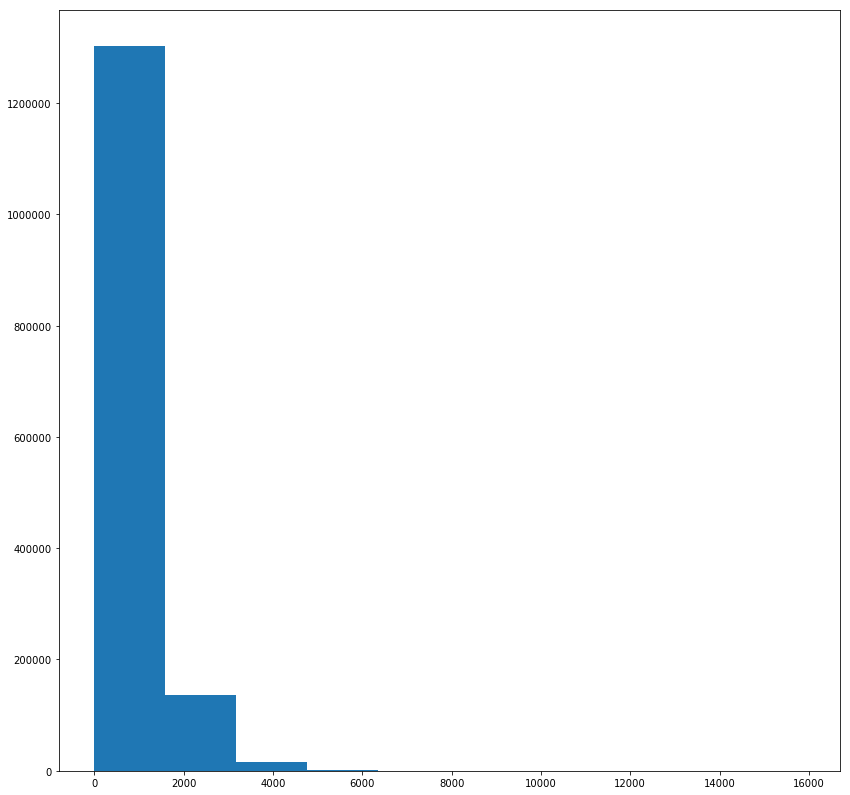

In [9]:
duration=list(df[np.abs(df.trip_duration-df.trip_duration.mean())<=(3*df.trip_duration.std())].trip_duration) #excluding outliers
fig=plt.figure(figsize = (14,14))
ax=fig.add_subplot(111)
ax.hist(duration);

## Trip distance (meters)

### Trip distance summary

In [10]:
df['distance'].describe()

count    1.458546e+06
mean     3.437852e+03
std      3.957224e+03
min      0.000000e+00
25%      1.232311e+03
50%      2.094071e+03
75%      3.874635e+03
max      1.918180e+05
Name: distance, dtype: float64

### Trip distance histogram

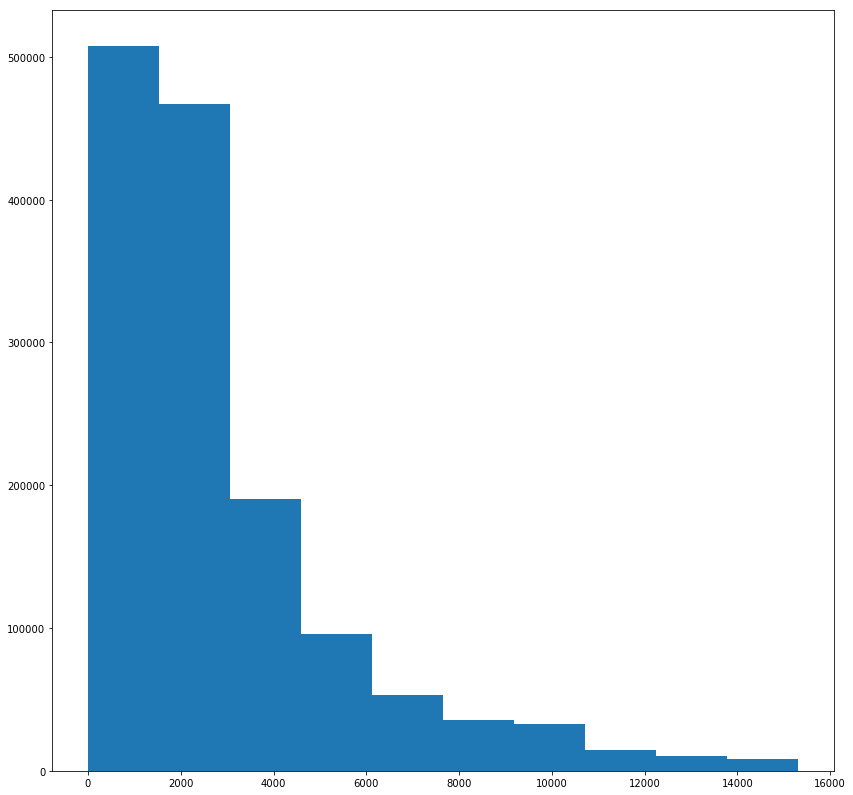

In [11]:
distance=list(df[np.abs(df.distance-df.distance.mean())<=(3*df.distance.std())].distance) #excluding outliers
fig=plt.figure(figsize = (14,14))
ax=fig.add_subplot(111)
ax.hist(distance);

## Pickup and Dropoff map

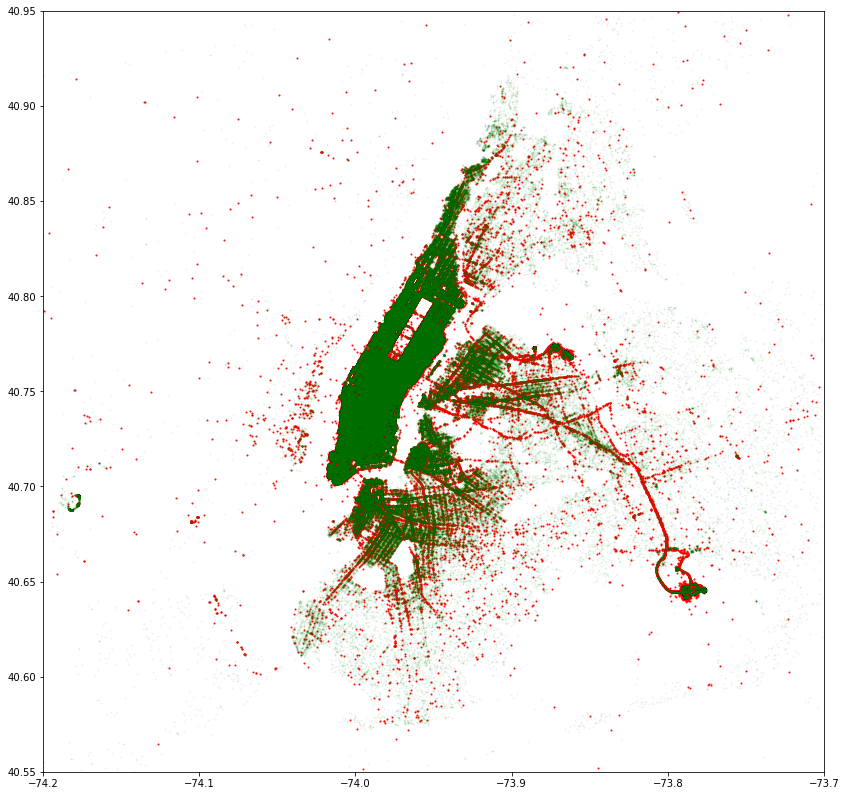

In [ ]:
longitude_pickup = list(df.pickup_longitude)
latitude_pickup = list(df.pickup_latitude)
longitude_dropoff = list(df.dropoff_longitude)
latitude_dropoff = list(df.dropoff_latitude)

fig=plt.figure(figsize = (14,14))
ax=fig.add_subplot(111)
ax.scatter(longitude_pickup,latitude_pickup, alpha = 0.8,marker='.',s=5,c='r')
ax.scatter(longitude_dropoff,latitude_dropoff, alpha = 0.05,c='g',marker='.',s=5)
ax.set(xlim=[-74.2,-73.7],ylim=[40.55,40.95])

plt.show()

In [ ]:
fig=plt.figure(figsize = (14,14))
ax=fig.add_subplot(111)
for i in range(0, len(longitude_pickup)):
    ax.plot([longitude_pickup[i],longitude_dropoff[i]],[latitude_pickup[i],latitude_dropoff[i]])
ax.set(xlim=[-74.2,-73.7],ylim=[40.55,40.95])
plt.show()

# Tracking anomalies

## Trip duration within 0 meters distance trips

In [ ]:
df[df.distance==0].trip_duration.describe()

In [ ]:
fig=plt.figure(figsize = (7,7))
ax=fig.add_subplot(111)
ax.hist(list(df[df.distance==0].trip_duration));

In [ ]:
fig=plt.figure(figsize = (7,7))
ax=fig.add_subplot(111)
temp=df[df.distance==0];
ax.hist(list(temp[np.abs(temp.trip_duration-df.trip_duration.mean())<=(3*df.trip_duration.std())].trip_duration));